In [1]:
%matplotlib inline
import psycopg2
from pyiem.network import Table as NetworkTable
import numpy as np
from pandas.io.sql import read_sql

import matplotlib.cm as cm
COOP = psycopg2.connect(database='coop', host='iemdb', user='nobody')

df = read_sql("""
  WITH data as 
  (SELECT station, year, max(extract(doy from day)) as doy from alldata
   WHERE month < 7 and low <= 28 and year < 2016 GROUP by station, year),
   agg1 as (
   SELECT station, avg(doy) from data GROUP by station
   )
   
  SELECT agg1.station, agg1.avg, ST_x(geom), ST_Y(geom) from stations, agg1
  WHERE agg1.station = stations.id and stations.network ~* 'CLIMATE'
""", COOP, index_col='station')


In [2]:
import datetime

labels = []
ticks = []
tickrange = range(int(df['avg'].min()) - 7, int(df['avg'].max()) + 7, 7)
for i in tickrange:
    ticks.append(i)
    ts = datetime.datetime(2000,1,1) + datetime.timedelta(days=(i-1))
    labels.append( ts.strftime("%-d %b") )

['6 Mar', '13 Mar', '20 Mar', '27 Mar', '3 Apr', '10 Apr', '17 Apr', '24 Apr', '1 May', '8 May', '15 May', '22 May', '29 May', '5 Jun']


/usr/lib64/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


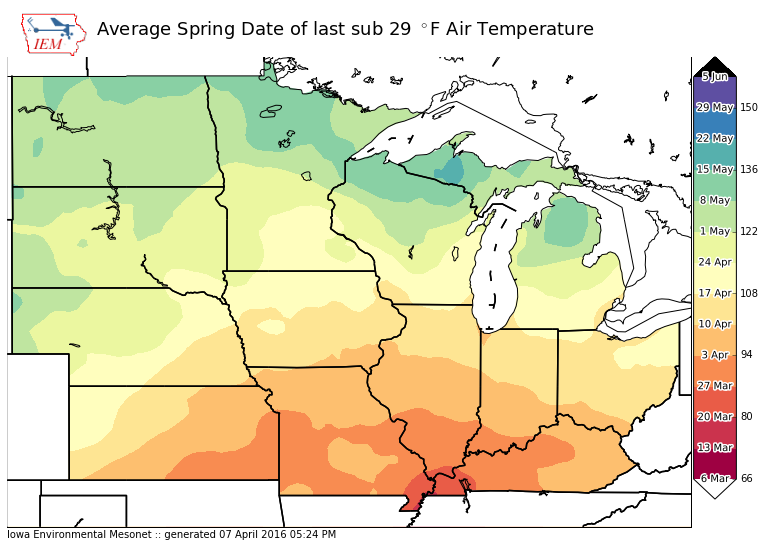

In [3]:
print labels
from pyiem.plot import MapPlot
m = MapPlot(sector='midwest',
            title='Average Spring Date of last sub 29 $^\circ$F Air Temperature')
cmap = cm.get_cmap('Spectral')
cmap.set_under('#ffffff')
cmap.set_over('#000000')
m.contourf(df['st_x'], df['st_y'], df['avg'], tickrange, clevlabels=labels, cmap=cmap)
#m.plot_values(hlons, hlats, h, '%s', labelbuffer=3)
#m.drawcounties()

m.postprocess(filename='160408.png')

